In [7]:
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library.standard_gates import *
from qiskit import QuantumCircuit
import itertools

For nice target_basis, this solver won't ever find a solution because A is actually RZRY and B is actually RYRZ gates.

In [35]:
#search for permutatons that allow a CX gate to match the AXBXC form
#2 conditions are that ABC = 1(up to a phase), and AXBXC = X
target_basis = [RZGate(-np.pi/2), RZGate(np.pi/2), IGate(), RYGate(np.pi/2),RYGate(-np.pi/2)]

for a,b,c in itertools.permutations(target_basis, r=3):

    qc= QuantumCircuit(2)
    qc.append(a,[1])
    qc.cx(0,1)
    qc.append(b,[1])
    qc.cx(0,1)
    qc.append(c,[1])
    
    #check if equivalent up to a phase
    if Operator(qc).equiv(Operator(CXGate())):
        print(qc.draw())
        break

print("None found")

None found


Find the solution by hand and get this, but notice the solver doens't say they are equivalent unless the S is there.

Despite equiv checking if equivalent up to a global phase?, this could cause problems

True


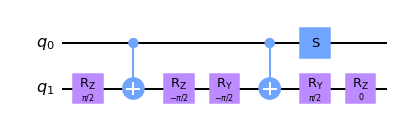

In [61]:
qc = QuantumCircuit(2)
qc.append(RZGate(np.pi/2),[1])
qc.cx(0,1)
qc.append(RZGate(-np.pi/2),[1])
qc.append(RYGate(-np.pi/2),[1])
qc.cx(0,1)
qc.append(SGate(), [0])
qc.append(RYGate(np.pi/2),[1])
qc.append(RZGate(0), [1])
print(Operator(qc).equiv(Operator(CXGate())))
qc.draw(output='mpl')

To convert a RY into an RZ use H,S gates

False


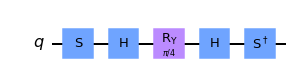

In [8]:
qc = QuantumCircuit(1)
theta = np.pi/4
qc.s(0)
qc.h(0)
qc.ry(theta,0)
qc.h(0)
qc.sdg(0)
print(Operator(qc).equiv(Operator(RZGate(theta))))
qc.draw(output='mpl')

In [60]:
a = Operator(RXGate(np.pi/2)).data * (Operator(RZGate(np.pi/3)).data * Operator(RXGate(-np.pi/2)).data)
a

array([[0.4330127-0.25j, 0.       +0.j  ],
       [0.       +0.j  , 0.4330127+0.25j]])

In [48]:
b = Operator(RYGate(np.pi/3)).data
b

array([[ 0.8660254+0.j, -0.5      +0.j],
       [ 0.5      +0.j,  0.8660254+0.j]])

In [57]:
Operator(a).equiv(b)

False

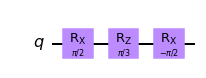

In [58]:
from qiskit import transpile
qc = QuantumCircuit(1)
qc.ry(np.pi/3,0)
transp = transpile(qc, basis_gates=['rx', 'rz'])
transp.draw(output='mpl')


In [53]:
Operator(transp).data

array([[ 0.8660254-5.55111512e-17j, -0.5      +0.00000000e+00j],
       [ 0.5      +0.00000000e+00j,  0.8660254+5.55111512e-17j]])

In [51]:
Operator(qc).equiv(Operator(transp))

True

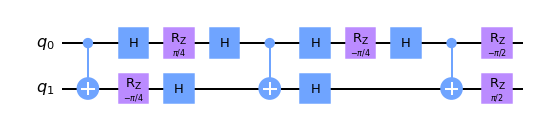

In [60]:
import qiskit.extensions as qe
class rootSwap(qe.UnitaryGate):
    def __init__(self):
        super().__init__(
            data=np.array(
                [
                    [1, 0, 0, 0],
                    [0, 0.5 * (1 + 1j), 0.5 * (1 - 1j), 0],
                    [0, 0.5 * (1 - 1j), 0.5 * (1 + 1j), 0],
                    [0, 0, 0, 1],
                ]
            ),
            label=r"$\sqrt{SWAP}$",
        )

temp = QuantumCircuit(2, name="cnot")
temp.cx(0,1)
temp.h(0)
temp.rz(np.pi/4,0)
temp.rz(-np.pi/4,1)
temp.h(0)
temp.h(1)
temp.cx(0,1)
temp.h(0)
temp.h(1)
temp.rz(-np.pi/4,0)
temp.h(0)
temp.cx(0,1)
temp.rz(-np.pi/2, 0)
temp.rz(np.pi/2,1)
temp.draw(output='mpl')

In [116]:
from sympy import init_printing
init_printing(fontsize=200)

In [2]:
import numpy as np 
import sympy as sym


def gen_u(label):
    a = sym.Symbol(f'alpha_{label}')
    b = sym.Symbol(f'beta_{label}')
    g = sym.Symbol(f'gamma_{label}')
    d = sym.Symbol(f'delta_{label}')
    generic_u = sym.Matrix([
        [sym.exp(1j*(a-b/2-d/2))*sym.cos(g/2),
        -1j*sym.exp(1j*(a-b/2+d/2))*sym.sin(g/2)],
        [-1j*sym.exp(1j*(a-b/2-d/2))*sym.sin(g/2),
        sym.exp(1j*(a-b/2+d/2))*sym.cos(g/2)]])
    return sym.kronecker_product(sym.eye(2),generic_u).as_explicit()

root_swap = sym.Matrix([
                    [1, 0, 0, 0],
                    [0, 0.5 * (1 + 1j), 0.5 * (1 - 1j), 0],
                    [0, 0.5 * (1 - 1j), 0.5 * (1 + 1j), 0],
                    [0, 0, 0, 1],
                ])

In [3]:
gen_u('A')

Matrix([
[       exp(1.0*I*(alpha_A - beta_A/2 - delta_A/2))*cos(gamma_A/2), -1.0*I*exp(1.0*I*(alpha_A - beta_A/2 + delta_A/2))*sin(gamma_A/2),                                                                 0,                                                                 0],
[-1.0*I*exp(1.0*I*(alpha_A - beta_A/2 - delta_A/2))*sin(gamma_A/2),        exp(1.0*I*(alpha_A - beta_A/2 + delta_A/2))*cos(gamma_A/2),                                                                 0,                                                                 0],
[                                                                0,                                                                 0,        exp(1.0*I*(alpha_A - beta_A/2 - delta_A/2))*cos(gamma_A/2), -1.0*I*exp(1.0*I*(alpha_A - beta_A/2 + delta_A/2))*sin(gamma_A/2)],
[                                                                0,                                                                 0, -1.0*I*exp(1.0*I*(alpha_A - beta_A/2 - delta_A

In [157]:
gen_u('A') * root_swap * gen_u('B') * root_swap * gen_u('C')

⎡    ⎛              ⎛           ⎛      β_A   δ_A⎞        ⎛      β_B   δ_B⎞    
⎢    ⎜              ⎜     1.0⋅ⅈ⋅⎜α_A - ─── - ───⎟  1.0⋅ⅈ⋅⎜α_B - ─── + ───⎟    
⎢    ⎜              ⎜           ⎝       2     2 ⎠        ⎝       2     2 ⎠    
⎢- ⅈ⋅⎜(0.5 + 0.5⋅ⅈ)⋅⎜- ⅈ⋅ℯ                       ⋅ℯ                       ⋅sin
⎢    ⎝              ⎝                                                         
⎢                                                                             
⎢    ⎛              ⎛         ⎛      β_A   δ_A⎞        ⎛      β_B   δ_B⎞      
⎢    ⎜              ⎜   1.0⋅ⅈ⋅⎜α_A - ─── - ───⎟  1.0⋅ⅈ⋅⎜α_B - ─── + ───⎟      
⎢    ⎜              ⎜         ⎝       2     2 ⎠        ⎝       2     2 ⎠    ⎛γ
⎢- ⅈ⋅⎜(0.5 + 0.5⋅ⅈ)⋅⎜- ℯ                       ⋅ℯ                       ⋅sin⎜─
⎢    ⎝              ⎝                                                       ⎝ 
⎢                                                                             
⎢                                    ⎛              